<a href="https://colab.research.google.com/github/Mars-or-bust/collage_builder/blob/master/HiddenPatchAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Flow Attack

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Imports

In [ ]:
import os
import cv2
import glob
import numpy as np
import random
import sys
from scipy.ndimage.interpolation import rotate, zoom
from sklearn.model_selection import train_test_split
from time import time
import torch
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.optim
import torch.nn as nn
import torch.utils.data
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
sys.path.append('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/' + 'pytorch-spynet')
sys.path.append('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/' + 'flowattack_utils')
import time
import csv
import datetime
import models
import custom_transforms
from utils import *
!pip install blessings
!pip install pypng

/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/submodules.py:12: ImportWarning: failed to load custom correlation modulewhich is needed for FlowNetC
  "which is needed for FlowNetC", ImportWarning)


     |████████████████████████████████| 655kB 2.9MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp37-none-any.whl size=67179 sha256=38033019494280427683f644febf0006f8448711a5df7b0e2f1f6f7451ea51c3
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


# PreProcessing

In [ ]:
# # USED TO LIMIT THE SIZE OF THE DATA TO 2500 SAMPLES 
# def video_to_frames(video):
#     # extract frames from a video and save to directory as 'x.png' where 
#     # x is the frame index
#     vidcap = cv2.VideoCapture(video)
#     count = 0
#     im_number = 0
#     image_array = []
#     while vidcap.isOpened():
#         success, image = vidcap.read()
#         count += 1
#         if success is False or im_number > 3:
#             break
#         elif success and (count%1==0) and count > 0:
#             image_array.append(image)
#             im_number += 1
        
#     np.save('flow_sample_imgs/'+video.split('/')[-1], np.array(image_array))
#     cv2.destroyAllWindows()
#     vidcap.release()

# count = 0

# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/')
# categories = glob.glob('UCF-101/*', recursive=True)
# # os.chdir('flow_sample_imgs')
# # for subfolder in categories:
# #   os.mkdir(subfolder.split('/')[-1])

# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/')
# file_list = glob.glob('UCF-101/*/*', recursive=True)

# for f in random.sample(file_list,2500):
#   video_to_frames(f)
#   count+=1
#   if count%100==0:
#     print(count)

In [ ]:
# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/')
# file_list = glob.glob('flow_sample_imgs/*', recursive=True)
# train_array = []
# test_array = []
# count = 0
# start_time = time.time()
# for f in file_list:
#   temp = np.load(f)[:2]
  
#   if count < 2000: 
#     train_array.append(temp)
#   else:
#     test_array.append(temp)

#   if count%100==0:
#     print('count:',count, '\ttime',time.time() - start_time)

#   count +=1

# np.save('train',np.array(train_array))
# np.save('test',np.array(test_array))

In [ ]:
# img1_v = train[0,0]
# img2_future_v = train[0,1]

In [ ]:
# # Build Flownet Dependencyy
# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/resample2d_package')
# !python3 setup.py build
# !python3 setup.py install

# SpyNet Creation

In [ ]:
# import models
# flow_net = getattr(models, 'FlowNetC')
# weights = torch.load('pretrained/FlowNet2-C_checkpoint.pth.tar')
# flow_net.load_state_dict(weights['state_dict'])

# pytorch_total_params = sum(p.numel() for p in flow_net.parameters())
# print("Number of model paramters: " + str(pytorch_total_params))

# flow_net = flow_net.cuda()

# flow_net.eval()

In [ ]:
# import torch
# import getopt
# import math
# import numpy
# import os
# import PIL
# import PIL.Image
# import sys

In [ ]:
#  def spynet(img1_v, img2_future_v): 
#   torch.set_grad_enabled(False) # make sure to not compute gradients for computational performance
#   torch.backends.cudnn.enabled = True # make sure to use cudnn for computational performance

#   arguments_strModel = 'sintel-final' # 'sintel-final', or 'sintel-clean', or 'chairs-final', or 'chairs-clean', or 'kitti-final'
#   tenFirst = torch.FloatTensor(np.reshape(np.transpose(img1_v,(2, 0, 1)), (3,240,320)))
#   tenSecond = torch.FloatTensor(np.resha e(np.transpose(img2_future_v, (2, 0, 1)), (3,240,320)))
#   arguments_strOut = './out.flo'
  

#   backwarp_tenGrid = {}

#   def backwarp(tenInput, tenFlow):
#     if str(tenFlow.shape) not in backwarp_tenGrid:
#       tenHor = torch.linspace(-1.0 + (1.0 / tenFlow.shape[3]), 1.0 - (1.0 / tenFlow.shape[3]), tenFlow.shape[3]).view(1, 1, 1, -1).expand(-1, -1, tenFlow.shape[2], -1)
#       tenVer = torch.linspace(-1.0 + (1.0 / tenFlow.shape[2]), 1.0 - (1.0 / tenFlow.shape[2]), tenFlow.shape[2]).view(1, 1, -1, 1).expand(-1, -1, -1, tenFlow.shape[3])

#       backwarp_tenGrid[str(tenFlow.shape)] = torch.cat([ tenHor, tenVer ], 1).cuda()
#     # end

#     tenFlow = torch.cat([ tenFlow[:, 0:1, :, :] / ((tenInput.shape[3] - 1.0) / 2.0), tenFlow[:, 1:2, :, :] / ((tenInput.shape[2] - 1.0) / 2.0) ], 1)

#     return torch.nn.functional.grid_sample(input=tenInput, grid=(backwarp_tenGrid[str(tenFlow.shape)] + tenFlow).permute(0, 2, 3, 1), mode='bilinear', padding_mode='border', align_corners=False)
#   # end


#   class Network(torch.nn.Module):
#     def __init__(self):
#       super(Network, self).__init__()

#       class Preprocess(torch.nn.Module):
#         def __init__(self):
#           super(Preprocess, self).__init__()
#         # end

#         def forward(self, tenInput):
#           tenBlue = (tenInput[:, 0:1, :, :] - 0.406) / 0.225
#           tenGreen = (tenInput[:, 1:2, :, :] - 0.456) / 0.224
#           tenRed = (tenInput[:, 2:3, :, :] - 0.485) / 0.229

#           return torch.cat([ tenRed, tenGreen, tenBlue ], 1)
#         # end
#       # end

#       class Basic(torch.nn.Module):
#         def __init__(self, intLevel):
#           super(Basic, self).__init__()

#           self.netBasic = torch.nn.Sequential(
#             torch.nn.Conv2d(in_channels=8, out_channels=32, kernel_size=7, stride=1, padding=3),
#             torch.nn.ReLU(inplace=False),
#             torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7, stride=1, padding=3),
#             torch.nn.ReLU(inplace=False),
#             torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=7, stride=1, padding=3),
#             torch.nn.ReLU(inplace=False),
#             torch.nn.Conv2d(in_channels=32, out_channels=16, kernel_size=7, stride=1, padding=3),
#             torch.nn.ReLU(inplace=False),
#             torch.nn.Conv2d(in_channels=16, out_channels=2, kernel_size=7, stride=1, padding=3)
#           )
#         # end

#         def forward(self, tenInput):
#           return self.netBasic(tenInput)
#         # end
#       # end

#       self.netPreprocess = Preprocess()

#       self.netBasic = torch.nn.ModuleList([ Basic(intLevel) for intLevel in range(6) ])

#       self.load_state_dict({ strKey.replace('module', 'net'): tenWeight for strKey, tenWeight in torch.hub.load_state_dict_from_url(url='http://content.sniklaus.com/github/pytorch-spynet/network-' + arguments_strModel + '.pytorch', file_name='spynet-' + arguments_strModel).items() })
#     # end

#     def forward(self, tenFirst, tenSecond):
#       tenFlow = []

#       tenFirst = [ self.netPreprocess(tenFirst) ]
#       tenSecond = [ self.netPreprocess(tenSecond) ]

#       for intLevel in range(5):
#         if tenFirst[0].shape[2] > 32 or tenFirst[0].shape[3] > 32:
#           tenFirst.insert(0, torch.nn.functional.avg_pool2d(input=tenFirst[0], kernel_size=2, stride=2, count_include_pad=False))
#           tenSecond.insert(0, torch.nn.functional.avg_pool2d(input=tenSecond[0], kernel_size=2, stride=2, count_include_pad=False))
#         # end
#       # end

#       tenFlow = tenFirst[0].new_zeros([ tenFirst[0].shape[0], 2, int(math.floor(tenFirst[0].shape[2] / 2.0)), int(math.floor(tenFirst[0].shape[3] / 2.0)) ])

#       for intLevel in range(len(tenFirst)):
#         tenUpsampled = torch.nn.functional.interpolate(input=tenFlow, scale_factor=2, mode='bilinear', align_corners=True) * 2.0

#         if tenUpsampled.shape[2] != tenFirst[intLevel].shape[2]: tenUpsampled = torch.nn.functional.pad(input=tenUpsampled, pad=[ 0, 0, 0, 1 ], mode='replicate')
#         if tenUpsampled.shape[3] != tenFirst[intLevel].shape[3]: tenUpsampled = torch.nn.functional.pad(input=tenUpsampled, pad=[ 0, 1, 0, 0 ], mode='replicate')

#         tenFlow = self.netBasic[intLevel](torch.cat([ tenFirst[intLevel], backwarp(tenInput=tenSecond[intLevel], tenFlow=tenUpsampled), tenUpsampled ], 1)) + tenUpsampled
#       # end

#       return tenFlow
#     # end
#   # end

#   ##########################################################

#   def estimate(tenFirst, tenSecond):
#     netNetwork = None

#     if netNetwork is None:
#       netNetwork = Network().cuda().eval()
#     # end

#     # print(tenFirst.shape, tenSecond.shape)

#     assert(tenFirst.shape[1] == tenSecond.shape[1])
#     assert(tenFirst.shape[2] == tenSecond.shape[2])

#     intWidth = tenFirst.shape[2]
#     intHeight = tenFirst.shape[1]

#     # assert(intWidth == 1024) # remember that there is no guarantee for correctness, comment this line out if you acknowledge this and want to continue
#     # assert(intHeight == 416) # remember that there is no guarantee for correctness, comment this line out if you acknowledge this and want to continue

#     tenPreprocessedFirst = tenFirst.cuda().view(1, 3, intHeight, intWidth)
#     tenPreprocessedSecond = tenSecond.cuda().view(1, 3, intHeight, intWidth)

#     intPreprocessedWidth = int(math.floor(math.ceil(intWidth / 32.0) * 32.0))
#     intPreprocessedHeight = int(math.floor(math.ceil(intHeight / 32.0) * 32.0))

#     tenPreprocessedFirst = torch.nn.functional.interpolate(input=tenPreprocessedFirst, size=(intPreprocessedHeight, intPreprocessedWidth), mode='bilinear', align_corners=False)
#     tenPreprocessedSecond = torch.nn.functional.interpolate(input=tenPreprocessedSecond, size=(intPreprocessedHeight, intPreprocessedWidth), mode='bilinear', align_corners=False)

#     tenFlow = torch.nn.functional.interpolate(input=netNetwork(tenPreprocessedFirst, tenPreprocessedSecond), size=(intHeight, intWidth), mode='bilinear', align_corners=False)

#     tenFlow[:, 0, :, :] *= float(intWidth) / float(intPreprocessedWidth)
#     tenFlow[:, 1, :, :] *= float(intHeight) / float(intPreprocessedHeight)


#     return tenFlow[0, :, :, :].cpu()
#   # end
  
#   return estimate(tenFirst, tenSecond)

In [ ]:
# # Generate a pseudo ground truth
# img_set = np.load('train.npy')
# truth = []
# for i, (img1, img2) in enumerate(torch.FloatTensor(img_set.transpose(0,1,4,2,3))):
#   truth.append(spynet(img1, img2))
#   if i%100==0:
#     print(i)

# truth = np.stack(truth)

# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack')
# np.save('ground_truth', truth)

In [ ]:
# tenOutput = spynet(tenFirst, tenSecond)

In [ ]:
# output shape
np.append(tenOutput.numpy(), np.zeros((1,240,320)),0).transpose(1,2,0).shape

(240, 320, 3)

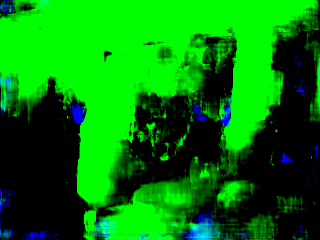

In [ ]:
# Spynet Test Output
cv2_imshow(np.append(tenOutput.numpy(), np.zeros((1,240,320)),0).transpose(1,2,0))

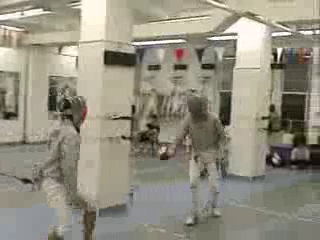

In [ ]:
# Original Image
cv2_imshow(img1_v)

In [ ]:
flow_net = spynet()
flow_fwd = flow_net(img1_v, img2_future_v)

# FlowNet

In [ ]:
# flow_net = getattr(models, 'FlowNetC')()
# weights = torch.load('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/' + 'flowattack_utils/'+ 'pretrained/FlowNet2-C_checkpoint.pth.tar')
# flow_net.load_state_dict(weights['state_dict'])

/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/FlowNetC.py:54: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  init.uniform(m.bias)
/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/FlowNetC.py:55: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(m.weight)
/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/FlowNetC.py:59: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  init.uniform(m.bias)
/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/flowattack_utils/models/FlowNetC.py:60: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(m.weight)


<All keys matched successfully>

# Generate Pseudo Ground Truth

In [ ]:
# root = '/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/'
# os.chdir(root + 'flowattack_utils')
# flow_net = getattr(models, 'SpyNet')(nlevels=6, pretrained=True)
# flow_net = flow_net.cuda().eval()

# os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack')
# # Generate a pseudo ground truth
# img_set = np.load('test.npy')
# start_time = time.time()
# truth = []

# for i, (img1, img2) in enumerate(torch.FloatTensor(img_set.transpose(0,1,4,2,3))):
#   img1 = img1.reshape((1,3,240,320)).cuda()
#   img2 = img2.reshape((1,3,240,320)).cuda()

#   with torch.no_grad():
#     truth.append(flow_net(img1, img2).cpu())

#   if i%10==0:
#     print(i, '\ttime:', time.time()-start_time)

# truth = np.stack(truth)

# np.save('ground_truth', truth)

# Adversarial Attack Implementation

## Load Data

In [ ]:
root = '/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/'

os.chdir('/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack')

# # pseudo_truth = np.load('ground_truth.npy')
# train_set = np.load('train.npy')
# val_set = np.load('test.npy')

# full = np.vstack((train_set,val_set))
# train_set, val_set = train_test_split(full, test_size = 500, shuffle=True, random_state=42)
# del full

full = np.load('train_old.npy')
train_set, val_set = train_test_split(full, test_size = 500, shuffle=True, random_state=42)
del full

# Get the train,test, and truth in the correct format
train_set = torch.FloatTensor(train_set.transpose(0,1,4,2,3))
val_set = torch.FloatTensor(val_set.transpose(0,1,4,2,3))
# pseudo_truth = torch.reshape(torch.FloatTensor(pseudo_truth),(500,2,240,320))
pseudo_truth = None


In [ ]:
# LOAD THE FLOWNET
os.chdir(root + 'flowattack_utils')
flow_net = getattr(models, 'SpyNet')(nlevels=6, pretrained=True)

Creating Spynet with 6 levels


## Attack Code

In [ ]:
class adversarial_patch:
  def __init__(self, train_set, val_set, val_ground_truth, flow_model, epochs, 
               patch_size=0.1, alpha=1, learning_rate=1e2, 
               save_freq=5, test_name='default', root=None, 
               train_from_existing_id=None, set_ID=None, max_total_epochs=None):
    # Initialize the data
    self.train_set = train_set
    self.val_set = val_set
    self.val_ground_truth = val_ground_truth

    # Initialize the parameters
    self.epochs = epochs
    self.flow_model = flow_model
    self.alpha = alpha
    self.learning_rate = learning_rate
    self.patch_size = patch_size

    # Initialize tracking
    if root is None:
      self.root = '/content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/'
    else:
      self.root = root
    if set_ID is None:
      self.test_ID = int(str(round(time.time()))[-5:])
    else:
      self.test_ID = set_ID
    self.test_name = test_name
    self.save_freq = save_freq
    self.temp_train_loss_list = []
    self.temp_val_loss_list = []

    if train_from_existing_id is None:
      self.max_total_epochs = epochs
      self.train_loss_list = []
      self.val_loss_list = []
      self.patch_list = []
    else:
      if max_total_epochs is None:
         self.max_total_epochs = epochs
      else:
          self.max_total_epochs = max_total_epochs
      self.train_loss_list = list(np.load(self.root + 'checkpoints/'+ self.test_name + '/train_loss_list_ID' + str(train_from_existing_id) +'.npy'))
      self.val_loss_list = list(np.load(self.root + 'checkpoints/'+ self.test_name + '/val_loss_list_ID' + str(train_from_existing_id) +'.npy'))
      self.patch_list = list(np.load(self.root + 'checkpoints/'+ self.test_name + '/patch_list_ID' + str(train_from_existing_id) +'.npy'))

    # initialize the rest
    self.seed = 42
    torch.manual_seed(self.seed)

    self.total_iter = 0

    self.flow_loader_h = 240
    self.flow_loader_w = 320
    self.image_size = min(self.flow_loader_h, self.flow_loader_w)

    if train_from_existing_id is None:
      self.patch, self.patch_shape = init_patch_square(self.image_size, self.patch_size)
      self.patch = self.patch #* 255 #// 1
    else:
      self.patch = self.patch_list[-1]
      self.patch_shape = self.patch.shape

    print('Patch Shape:', self.patch_shape, '\tPercent of Image:', str(self.patch_shape[-1]*self.patch_shape[-2] / (self.image_size **2) * 100) + '%')

    self.patch_init = self.patch.copy()
    self.mask = np.ones(self.patch_shape)

  def save(self, path='default'):
    if path is 'default':
      checkpoint_path = self.root + 'checkpoints/'+ self.test_name
    else:
      checkpoint_path = path
    print('Saving Intermediate Model:', checkpoint_path)
    np.save(checkpoint_path + '/train_loss_list_ID'+ str(self.test_ID), np.array(self.train_loss_list))
    np.save(checkpoint_path + '/val_loss_list_ID' + str(self.test_ID), np.array(self.val_loss_list))
    np.save(checkpoint_path + '/patch_list_ID' + str(self.test_ID), np.array(self.patch_list))


  def fit(self):
      checkpoint_path = self.root + 'checkpoints/'+ self.test_name
      if os.path.exists(checkpoint_path) is False:
        os.makedirs(checkpoint_path)

      self.flow_model = self.flow_model.cuda()

      cudnn.benchmark = True

      for epoch in range(0, self.epochs):

          start = time.time()

          # train
          self.train()

          # Validate
          self.validate()

          self.patch_list.append(self.patch.copy())

          # measure elapsed time
          print('Epoch:', epoch,
                '\tTrain_loss', self.train_loss_list[-1],
                '\tVal_loss', self.val_loss_list[-1],
                '\tBatch Time:', round(time.time() - start))
          
          if epoch % self.save_freq == 0:
            # save the losses and patch lists
            self.save(checkpoint_path)

          # retraining early stop
          if len(self.train_loss_list) is not None and \
          len(self.train_loss_list) >= self.max_total_epochs and \
          self.max_total_epochs != self.epochs:
            model.save(checkpoint_path)
            print('Max Number of Epochs Reached:', str(self.max_total_epochs))
            break     


      print('Training Complete')


  def train(self):
    # Zero out the loss list for tracking
    self.temp_train_loss_list = []

    self.flow_model.eval()

    patch_shape_orig = self.patch_shape
    for i, (img1, img2) in enumerate(self.train_set):

        # print('TRAIN A:', img1.shape, img2.shape)

        # Reshape in order to pass to the flow model
        img1 = torch.reshape(img1, (1,3,240,320))
        img2 = torch.reshape(img2, (1,3,240,320))

        img1_v = Variable(img1.cuda())
        img2_v = Variable(img2.cuda())

        data_shape = img1.cpu().detach().numpy().shape

        # keep the patch within the bounds of the image
        self.patch = torch.clamp(torch.FloatTensor(self.patch), -255, 255)

        # print('TRAIN C', self.patch.shape, self.mask.shape, self.patch_init.shape, data_shape, self.patch_shape)
        #square_transform(patch, mask, patch_init, data_shape, patch_shape, norotate=norotate)
        self.patch, self.mask, self.patch_init, rx, ry = square_transform(self.patch, self.mask, self.patch_init, data_shape, self.patch_shape, norotate=True)


        # print('TRAIN D', self.patch.shape, self.mask.shape)
        
        self.patch, self.mask = torch.FloatTensor(self.patch).cuda(), torch.FloatTensor(self.mask).cuda()
        self.patch_init = torch.FloatTensor(self.patch_init).cuda()

        # set as variables to get the gradients
        patch_v = Variable(self.patch)
        mask_v = Variable(self.mask)
        patch_init_v = Variable(self.patch_init).cuda()

        # The original flow prediction
        flow_pred_v = self.flow_model(img1_v, img2_v)

        # Update the image with the transparent mask to get the target flow
        # img1_v = torch.mul((1-mask_v * self.alpha), img1_v)
        # img2_v = torch.mul((1-mask_v * self.alpha), img2_v)

        # print("TRAIN B", type(img1_v), type(img2_v))


        # The pseudo truth flow
        target_v = Variable(flow_pred_v.data.clone()).cuda()
        #target_v = Variable(flow_pred_v.data.clone()).cuda()


        # Perform the attack
        adv_img1_v, adv_img2_v, patch_v = self.patch_attack(img1_v, img2_v, patch_v, mask_v, patch_init_v, target_v)

        # Save the patch and mask
        self.masked_patch_v = torch.mul(mask_v, patch_v)
        self.patch = self.masked_patch_v.data.cpu()
        self.mask = mask_v.data.cpu()
        self.patch_init = patch_init_v.data.cpu()

        # Zero out the new patch
        new_patch = np.zeros(self.patch_shape)
        new_mask = np.zeros(self.patch_shape)
        new_patch_init = np.zeros(self.patch_shape)
        for x in range(new_patch.shape[0]):
            for y in range(new_patch.shape[1]):
                # Update the patch
                new_patch[x][y] = self.patch[x][y][ry:ry+self.patch_shape[-2], rx:rx+self.patch_shape[-1]]
                new_mask[x][y] = self.mask[x][y][ry:ry+self.patch_shape[-2], rx:rx+self.patch_shape[-1]]
                new_patch_init[x][y] = self.patch_init[x][y][ry:ry+self.patch_shape[-2], rx:rx+self.patch_shape[-1]]


        self.patch = new_patch
        # Save the patch
        self.mask = new_mask # * self.alpha
        self.patch_init = new_patch_init


        self.patch = zoom(self.patch, zoom=(1,1,patch_shape_orig[2]/self.patch_shape[2], patch_shape_orig[3]/self.patch_shape[3]), order=1)
        self.mask = zoom(self.mask, zoom=(1,1,patch_shape_orig[2]/self.patch_shape[2], patch_shape_orig[3]/self.patch_shape[3]), order=0)
        self.patch_init = zoom(self.patch_init, zoom=(1,1,patch_shape_orig[2]/self.patch_shape[2], patch_shape_orig[3]/self.patch_shape[3]), order=1)

        self.total_iter += 1

    # Update losses for training
    self.train_loss_list.append(sum(self.temp_train_loss_list) / len(self.temp_train_loss_list))


  def patch_attack(self, img1_v, img2_v, patch_v, mask_v, patch_init_v, target_v):
      self.flow_model.eval()

      #Generate the adversarial images
      adv_img1_v = torch.mul((1-mask_v * self.alpha), img1_v) + torch.mul(mask_v * self.alpha, patch_v)
      adv_img2_v = torch.mul((1-mask_v * self.alpha), img2_v) + torch.mul(mask_v * self.alpha, patch_v)

      # print('ATTACK:', adv_img1_v.shape, adv_img2_v.shape)
      # print('ATTACK GRAD:', adv_img1_v.grad, adv_img2_v.grad)

      # the 1st image
      adv_img1_v = Variable(adv_img1_v, requires_grad=True).cuda()
      # The 2nd image
      adv_img2_v = Variable(adv_img2_v, requires_grad=True).cuda()

      # the patch 
      just_the_patch = Variable(patch_v).cuda()

      # Get the flownet output for adversarial examples
      adv_flow_out_v = self.flow_model(adv_img1_v, adv_img2_v).cuda()

      # calculate the loss using cosine smilarity
      cos_loss = -1*(nn.functional.cosine_similarity(adv_flow_out_v, -1*target_v)).mean()

      # print('ATTACK SHAPES:', mask_v.shape, just_the_patch.mean(), patch_init_v.mean())
      # cv2_imshow(np.reshape(just_the_patch.cpu().numpy(),(3, 240, 320)).transpose(1,2,0))
      # cv2_imshow(np.reshape(patch_init_v.cpu().numpy(),(3, 240, 320)).transpose(1,2,0))
      # cv2_imshow(np.reshape(adv_img1_v.cpu().detach().numpy(),(3, 240, 320)).transpose(1,2,0))
      # cv2_imshow(np.reshape(adv_img2_v.cpu().detach().numpy(),(3, 240, 320)).transpose(1,2,0))

      # RETAIN THE GRADIENTS
      adv_img1_v.retain_grad()
      adv_img2_v.retain_grad()

      # torch.autograd.backward(loss, [adv_img2_v,adv_img2_v])
      cos_loss.backward()

      # print(adv_img2_grad)

      # Update the patch 
      adv_img1_grad = adv_img1_v.grad.clone()
      adv_img2_grad = adv_img2_v.grad.clone()

      # print(adv_img1_grad + adv_img2_grad * 0.5*self.learning_rate)

      # Average the gradients and limit how far the pixels can change
      patch_v = patch_v + torch.clamp(0.5*self.learning_rate*(adv_img1_grad + adv_img2_grad), -2, 2)

      # Restrict the patch values to between 0 and 255
      patch_v = torch.clamp(patch_v, -255, 255)

      # Zero out the variables gradients
      adv_img1_v.grad.data.zero_()
      adv_img2_v.grad.data.zero_()

      # Generate the new adversarial images
      adv_img1_v = torch.mul((1-mask_v), img1_v) + torch.mul(mask_v, patch_v)
      adv_img2_v = torch.mul((1-mask_v), img2_v) + torch.mul(mask_v, patch_v)

      adv_img1_v = torch.clamp(adv_img1_v, 0, 255)
      adv_img2_v = torch.clamp(adv_img2_v, 0, 255)

      # Track the loss
      loss_value = cos_loss.item()
      self.temp_train_loss_list.append(loss_value)

      return adv_img1_v, adv_img2_v, patch_v


  def get_epe(self, true_flow, pred_flow):
    """EPE is the average L2 distance between the prediction and ground truth"""

    # print("EPE",true_flow.shape, pred_flow.shape)

    true_flow = torch.reshape(true_flow, (2,240,320)).cpu()
    pred_flow = torch.reshape(pred_flow, (2,240,320)).cpu()

    true_u = true_flow[0]
    true_v = true_flow[1]

    pred_u = pred_flow[0]
    pred_v = pred_flow[1]

    epe = torch.sqrt((true_u - pred_u)**2 + (true_v - pred_v)**2)
    
    return epe.mean()

  def get_cos_sim(self, true_flow, pred_flow):

    # print("EPE",true_flow.shape, pred_flow.shape)

    true_flow = true_flow.cpu()
    pred_flow = pred_flow.cpu()

    return -1*(nn.functional.cosine_similarity(true_flow, pred_flow)).mean()

  
  def validate(self):  
      with torch.no_grad():

        self.flow_model.eval()
    
        end = time.time()

        epe_list = []
        adv_epe_list = []
        cos_sim_list = []
        adv_cos_sim_list = []

    
        for i, (img1,img2) in enumerate(self.val_set):


            # Reshape before passing to the flow net
            img1 = torch.reshape(img1, (1,3,240,320))
            img2 = torch.reshape(img2, (1,3,240,320))
    
            data_shape = img1.cpu().detach().numpy().shape
            patch_full, mask_full, _, _, _ = square_transform(self.patch, self.mask, self.patch.copy(), data_shape, self.patch_shape, norotate=True)
            patch_full, mask_full = torch.FloatTensor(patch_full), torch.FloatTensor(mask_full)

            # turn the imgs into variables
            img1_v = Variable(img1.cuda(), volatile=True)
            img2_v = Variable(img2.cuda(), volatile=True)
    
            # print("VAL A:", img1_v.shape, img2_v.shape)
            flow_fwd = self.flow_model(img1_v, img2_v)

            # Create variables for the patch and mask
            patch_full = patch_full.cuda() 
            mask_full = mask_full.cuda()
            patch_v = Variable(patch_full)
            mask_v = Variable(mask_full)
    
            # Restrict the patch values to between 0 and 255
            patch_v = torch.clamp(patch_v, -255, 255)

            #apply the patch to the image
            adv_img1_v = torch.mul((1-mask_v * self.alpha), img1_v) + torch.mul(mask_v * self.alpha, patch_v)
            adv_img2_v = torch.mul((1-mask_v * self.alpha), img2_v) + torch.mul(mask_v * self.alpha, patch_v)
    
            adv_img1_v = torch.clamp(adv_img1_v, 0, 255)
            adv_img2_v = torch.clamp(adv_img2_v, 0, 255)
    
            adv_flow_fwd = self.flow_model(adv_img1_v, adv_img2_v)
    
            # epe = self.get_epe(self.val_ground_truth[i], torch.reshape(flow_fwd, (2, 240, 320)))
            # cos_sim = nn.functional.cosine_similarity(self.val_ground_truth[i], torch.reshape(flow_fwd, (2, 240, 320))).mean()
            adv_epe = self.get_epe(flow_fwd, torch.reshape(adv_flow_fwd, (2, 240, 320)))
            adv_cos_sim = self.get_cos_sim(-1*torch.reshape(flow_fwd, (2,240,320)), torch.reshape(adv_flow_fwd, (2, 240, 320)))

            # self.temp_val_loss_list.append([epe,adv_epe,cos_sim,adv_cos_sim])
            # epe_list.append(epe)
            # cos_sim_list.append(cos_sim)
            adv_epe_list.append(adv_epe)
            adv_cos_sim_list.append(adv_cos_sim)
  
        # Save the losses for later
        # mean_epe = sum(epe_list) / len(epe_list)
        # mean_cos_sim = sum(cos_sim_list) / len(cos_sim_list)
        mean_adv_epe = sum(adv_epe_list) / len(adv_epe_list)
        mean_adv_cos_sim = sum(adv_cos_sim_list) / len(adv_cos_sim_list)



        # self.val_loss_list.append([mean_epe,mean_adv_epe,mean_cos_sim,mean_adv_cos_sim])
        self.val_loss_list.append([mean_adv_epe, mean_adv_cos_sim])

  def no_flow_test(self, patch_id=-1):  
      with torch.no_grad():

        self.flow_model.eval()
    
        end = time.time()

        no_flow_epe_list = []
        no_flow_adv_epe_list = []
        no_flow_cos_sim_list = []
        no_flow_adv_cos_sim_list = []

        no_flow_loss_list = []

    
        for i, (img1,img2) in enumerate(self.val_set):


            # Reshape before passing to the flow net
            img1 = torch.reshape(img1, (1,3,240,320))
            img2 = torch.reshape(img2, (1,3,240,320))

            img1_v = Variable(img1.cuda(), volatile=True)
            img2_v = Variable(img2.cuda(), volatile=True)
    
            # print("VAL A:", img1_v.shape, img2_v.shape)
            flow_fwd = self.flow_model(img1_v, img1_v)
    
            data_shape = img1.cpu().detach().numpy().shape
            patch_full, mask_full, _, _, _ = square_transform(self.patch[patch_id], self.mask, self.patch[patch_id].copy(), data_shape, self.patch_shape, norotate=True)
            patch_full, mask_full = torch.FloatTensor(patch_full), torch.FloatTensor(mask_full)

            # Create variables for the patch and mask
            patch_full = patch_full.cuda() 
            mask_full = mask_full.cuda()
            patch_v = Variable(patch_full)
            mask_v = Variable(mask_full)
    
            # Restrict the patch values to between 0 and 255
            patch_v = torch.clamp(patch_v, -255, 255)

            #apply the patch to the image
            adv_img1_v = torch.mul((1-mask_v * self.alpha), img1_v) + torch.mul(mask_v * self.alpha, patch_v)
            adv_img2_v = torch.mul((1-mask_v * self.alpha), img2_v) + torch.mul(mask_v * self.alpha, patch_v)
    
            adv_img1_v = torch.clamp(adv_img1_v, 0, 255)
            adv_img2_v = torch.clamp(adv_img2_v, 0, 255)
    
            adv_flow_fwd = self.flow_model(adv_img1_v, adv_img1_v)
    
            epe = self.get_epe(torch.zeros((2, 240, 320)), torch.reshape(flow_fwd, (2, 240, 320)))
            cos_sim = self.get_cos_sim(torch.zeros((2, 240, 320)), torch.reshape(flow_fwd, (2, 240, 320)))
            adv_epe = self.get_epe(torch.zeros((2, 240, 320)), torch.reshape(adv_flow_fwd, (2, 240, 320)))
            adv_cos_sim = self.get_cos_sim(torch.zeros((2, 240, 320)), torch.reshape(adv_flow_fwd, (2, 240, 320)))
            # self.temp_val_loss_list.append([epe,adv_epe,cos_sim,adv_cos_sim])
            no_flow_epe_list.append(epe)
            no_flow_cos_sim_list.append(cos_sim)
            no_flow_adv_epe_list.append(adv_epe)
            no_flow_adv_cos_sim_list.append(adv_cos_sim)
  
        # Save the losses for later
        mean_epe = sum(no_flow_epe_list) / len(no_flow_epe_list)
        mean_cos_sim = sum(no_flow_cos_sim_list) / len(no_flow_cos_sim_list)
        mean_adv_epe = sum(no_flow_adv_epe_list) / len(no_flow_adv_epe_list)
        mean_adv_cos_sim = sum(no_flow_adv_cos_sim_list) / len(no_flow_adv_cos_sim_list)

        # self.val_loss_list.append([mean_epe,mean_adv_epe,mean_cos_sim,mean_adv_cos_sim])
        no_flow_loss_list.append([mean_epe, mean_cos_sim, mean_adv_epe,mean_adv_cos_sim])

      return no_flow_loss_list, no_flow_epe_list, no_flow_adv_epe_list

  def show_adv_example(self, train_img_idx=0, patch_id=-1):
      img1 = torch.reshape(self.train_set[0,0], (1,3,240,320)).cpu()
      patch = torch.FloatTensor(self.patch_list[patch_id])

      data_shape = img1.detach().numpy().shape
      patch_full, mask_full, _, _, _ = square_transform(patch, self.mask, patch, data_shape, self.patch_shape, norotate=True)
      patch_full, mask_full = torch.FloatTensor(patch_full), torch.FloatTensor(mask_full)


      img_w_patch = torch.mul(1-(mask_full* self.alpha), img1) + torch.mul(mask_full * self.alpha, patch_full)
      cv2_imshow(img_w_patch[0].cpu().numpy().transpose((1,2,0)))

  def show_patch(self, patch_index=-1):
      ptch = self.patch.cpu().numpy().reshape(1,self.patch_shape[-1],self.patch_shape[-1])
      cv2_imshow(ptch.transpose((1,2,0)))
        


# Reproduce the original


In [ ]:
alpha = 1
epochs = 1
patch_size = 0.2

In [ ]:
model_base = adversarial_patch(train_set, val_set, pseudo_truth, flow_net, epochs, patch_size, alpha,
                          test_name = 'SpyNet', 
                          train_from_existing_id = 103,
                          max_total_epochs=None,
                          save_freq = 3,
                          set_ID=104)
model_base.fit()

Patch Shape: (1, 3, 48, 48) 	Percent of Image: 4.0%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:332: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:333: UserWarning: volatile was removed and now has no effect. Use `wi

Epoch: 0 	Train_loss 0.5927248017287348 	Val_loss [tensor(548.5415), tensor(0.6361)] 	Batch Time: 103
Saving Intermediate Model: /content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/checkpoints/SpyNet
Training Complete


## Results

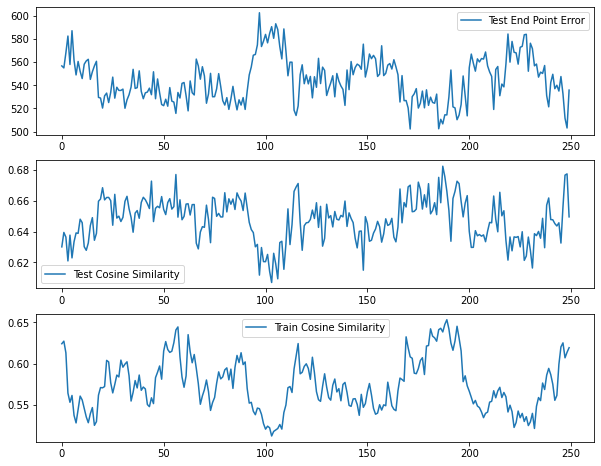

In [ ]:
import matplotlib.pyplot as plt 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False, figsize=(10, 8))
ax1.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,0], 
         label='Test End Point Error');
# ax1.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,0], 
#          label='End Point Error');
ax2.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,1], 
         label='Test Cosine Similarity');
# ax2.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,1], 
#          label='Cosine Similarity');
ax3.plot(range(0, len(model.train_loss_list)), model.train_loss_list, 
         label='Train Cosine Similarity');

ax1.legend();
ax2.legend();
ax3.legend();


In [ ]:
# fname = model.root + 'checkpoints/'+ model.test_name + '/patch_list_ID' + str(3875) +'.npy'
# f = np.load(fname)
# f.shape

(41, 1, 3, 24, 24)

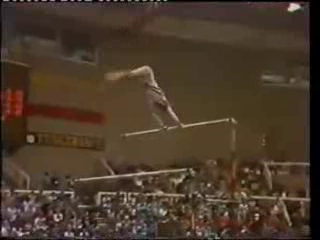

In [ ]:
cv2_imshow(train_set[0,0].numpy().transpose((1,2,0)))

In [ ]:
train_set[0,0].shape

torch.Size([3, 240, 320])

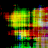

In [ ]:
cv2_imshow(model_base.patch_list[215][0].transpose((1,2,0)))

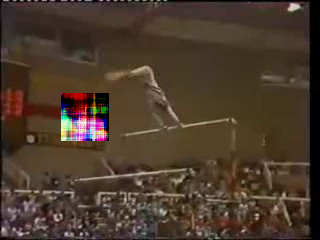

In [ ]:
model.show_adv_example()

# Hidden Patch

In [ ]:
alpha = 0.5
epochs = 1
patch_size = 0.2

In [ ]:
model_05 = adversarial_patch(train_set, val_set, pseudo_truth, flow_net, epochs, patch_size, alpha,
                          test_name = 'Hidden', 
                          train_from_existing_id = 102,
                          max_total_epochs=None,
                          save_freq = 3,
                          set_ID=103)
model_05.fit()

Patch Shape: (1, 3, 48, 48) 	Percent of Image: 4.0%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:332: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:333: UserWarning: volatile was removed and now has no effect. Use `wi

Epoch: 0 	Train_loss 0.6514642977113836 	Val_loss [tensor(533.9982), tensor(0.6526)] 	Batch Time: 102
Saving Intermediate Model: /content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/checkpoints/Hidden
Training Complete


## Results

In [ ]:
# train_loss_list = [i - 1 for i in model.train_loss_list]

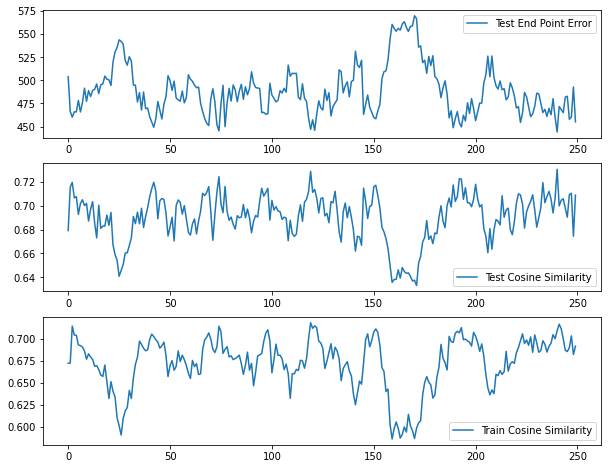

In [ ]:
import matplotlib.pyplot as plt 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False, figsize=(10, 8))
ax1.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,0], 
         label='Test End Point Error');
# ax1.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,0], 
#          label='End Point Error');
ax2.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,1], 
         label='Test Cosine Similarity');
# ax2.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,1], 
#          label='Cosine Similarity');
ax3.plot(range(0, len(model.train_loss_list)), model.train_loss_list, 
         label='Train Cosine Similarity');

ax1.legend();
ax2.legend();
ax3.legend();

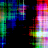

In [ ]:
cv2_imshow(model_05.patch_list[60][0].transpose((1,2,0)))

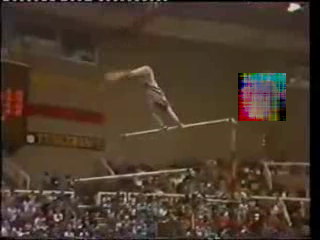

In [ ]:
model.show_adv_example()

# Hidden Patch 0.1

In [ ]:
alpha = 0.1
epochs = 1
patch_size = 0.2

100 -> First Test

In [ ]:
model_01 = adversarial_patch(train_set, val_set, pseudo_truth, flow_net, epochs, patch_size, alpha,
                          test_name = 'Hidden10', 
                          train_from_existing_id = 100,
                          max_total_epochs=None,
                          save_freq = 3,
                          set_ID=101)
model_01.fit()

Patch Shape: (1, 3, 48, 48) 	Percent of Image: 4.0%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:332: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:333: UserWarning: volatile was removed and now has no effect. Use `wi

Epoch: 0 	Train_loss 0.6478639578872826 	Val_loss [tensor(528.5999), tensor(0.6556)] 	Batch Time: 102
Saving Intermediate Model: /content/gdrive/My Drive/SP 2021: IST 520, 590, 597/Adversarial_Flow_Attack/checkpoints/Hidden10
Training Complete


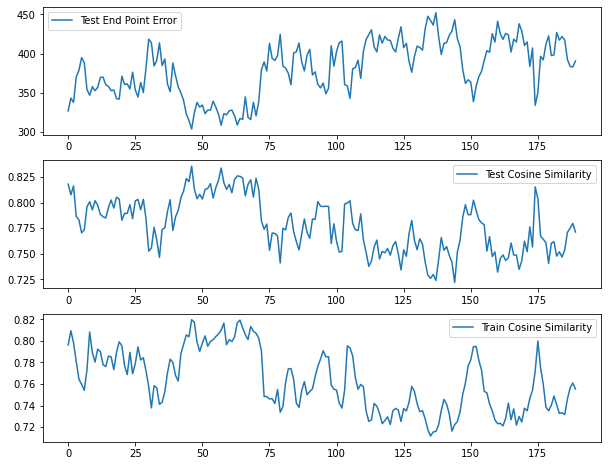

In [ ]:
import matplotlib.pyplot as plt 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False, figsize=(10, 8))
ax1.plot(range(0, np.array(model_01.val_loss_list).shape[0]), np.array(model_01.val_loss_list)[:,0], 
         label='Test End Point Error');
# ax1.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,0], 
#          label='End Point Error');
ax2.plot(range(0, np.array(model_01.val_loss_list).shape[0]), np.array(model_01.val_loss_list)[:,1], 
         label='Test Cosine Similarity');
# ax2.plot(range(0, np.array(model.val_loss_list).shape[0]), np.array(model.val_loss_list)[:,1], 
#          label='Cosine Similarity');
ax3.plot(range(0, len(model_01.train_loss_list)), model_01.train_loss_list, 
         label='Train Cosine Similarity');

ax1.legend();
ax2.legend();
ax3.legend();

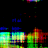

In [ ]:
cv2_imshow(model_01.patch_list[130][0].transpose((1,2,0)))

# Zero Flow Test

## Across All images

In [ ]:
result, og_img, adv_img = model_base.no_flow_test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:400: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:401: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affin

In [ ]:
result

[[tensor(773.5825), tensor(0.), tensor(776.3060), tensor(0.)]]

In [ ]:
result2, og_img2, adv_img2 = model_05.no_flow_test()
result2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:400: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:401: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affin

[[tensor(773.5825), tensor(0.), tensor(777.5757), tensor(0.)]]

In [ ]:
result3, og_img3, adv_img3 = model_01.no_flow_test()
result3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:400: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:401: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affin

[[tensor(773.5825), tensor(0.), tensor(776.7960), tensor(0.)]]

In [ ]:
for i in [776.7960,777.5757,776.3060]:
  print(i / 773.5825)

1.0041540495034467
1.0051619575158435
1.0035206328995292


In [ ]:
print(max(np.array(model_base.val_loss_list)[:,0]) / np.array(model_base.val_loss_list)[0,0])

1.0825926


tensor(inf)

## Visualization

In [ ]:
# flow_net = flow_net.cuda()
zero_flow = flow_net(np.reshape(val_set[1,0], (1,3,240,320)).cuda(),np.reshape(val_set[0,0], (1,3,240,320)).cuda())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


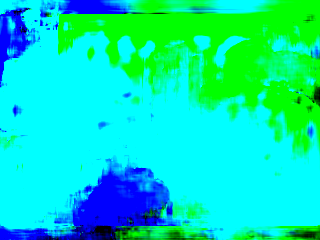

In [ ]:
zero_flow_transpose = np.append(zero_flow.cpu().detach().numpy(), np.zeros((1,1,240,320)),1).reshape((3,240,320)).transpose(1,2,0)
cv2_imshow(zero_flow_transpose)

In [ ]:
img1 = val_set[1,0].numpy()
img1 = img1.reshape(1,3,240,320)
# img1[0,:,10:58,10:58] = img1[0,:,10:58,10:58] * model.alpha + model.patch[0] * model.alpha
img1[0,:,10:58,10:58] = img1[0,:,10:58,10:58] * (1 - 0.5) + model_05.patch_list[60] * 0.5

215 60 130 -> 1, 0.5, 0.1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


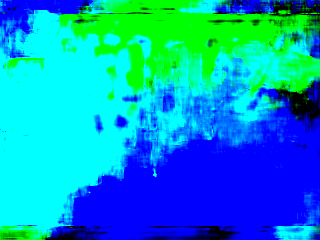

In [ ]:
zero_flow = flow_net(torch.FloatTensor(img1).cuda(), torch.FloatTensor(img1).cuda())
zero_flow_transpose = np.append(zero_flow.cpu().detach().numpy(), np.zeros((1,1,240,320)),1).reshape((3,240,320)).transpose(1,2,0)
cv2_imshow(zero_flow_transpose)

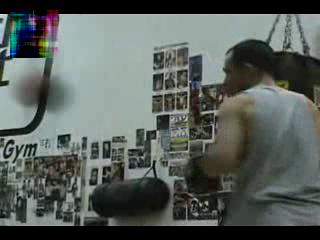

In [ ]:
cv2_imshow(img1.reshape(3,240,320).transpose(1,2,0))

In [ ]:
img1.shape

(1, 3, 240, 320)

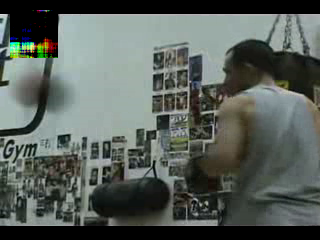

In [ ]:
cv2_imshow(val_set[1,0].numpy().reshape(3,240,320).transpose(1,2,0))

# Video of Patch Development For Gifs

In [ ]:
all_patches = model.patch_list
all_patches = np.array(all_patches)
all_patches = all_patches.reshape(all_patches.shape[0], 3, 48, 48).transpose(0,2,3,1)

print(all_patches.shape)

from cv2 import VideoWriter, VideoWriter_fourcc

width = 48
height = 48
FPS = 24
seconds = 10


fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter(model.root + '/' + model.test_name + str(model.test_ID) + '_patch.avi', fourcc, float(FPS), (width, height))

for i in range(len(all_patches)):
    frame = np.clip(all_patches[i],0,255).astype(np.uint8)
    video.write(frame)
video.release()

(105, 48, 48, 3)
